In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance 

## This is the mechanistic model we've created 

In [2]:
#########################################
#### The candidate model as a function
#########################################

def run_model_N_gamma(initial_pool_population, prob_2_copy, num_reps): 
    """
    This model simulates the number of birds to follow a leader bird
    departing from a stop-over site. It repeat this num_reps times and
    returns a list of all of the independent group sizes.
    """
    group_size_list = np.zeros(num_reps)
    
    #run it the number of times reqested
    for rep in range(num_reps):
    
        #first individual leaves
        num_birds_leaving = 1
        group_size = num_birds_leaving #put this bird in the group to leave
        pool_population = initial_pool_population - num_birds_leaving #update the pool size
    
        #everyone left in pool potentially follows the initial leaver
        num_copying = np.random.binomial(pool_population, prob_2_copy, 1)
        while(num_copying>0):
        
            #subtract followsers from the pool
            pool_population = pool_population - num_copying
        
            #add them to the leaving group
            group_size = group_size + num_copying
        
            #find out how many copy the copiers
            num_copying = np.random.binomial(pool_population, (1-(1-prob_2_copy)**num_copying), 1)
        
        group_size_list[rep] = group_size
    
    return group_size_list

## Load & prep empirical data
(two species)

In [10]:
#load empirical data
species = 'BlackheadedGull'
#species = 'Commic_Tern'

empirical_group_sizes = np.load('empirical_data/group_sizes_' + species + '.npy')
#print(empirical_group_sizes)

#create histogram
## make bins
max_group_size = 512+2
bin_edges = list(range(1,max_group_size))
## get counts
group_size_hist, _ = np.histogram(empirical_group_sizes, bin_edges)
##normalize histogram
emp_group_size_pdf = group_size_hist/np.sum(group_size_hist)

(array([507.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04272869, 0.08545739, 0.12818608, 0.17091478,
        0.21364347, 0.25637217, 0.29910086, 0.34182955, 0.38455825,
        0.42728694]),
 <BarContainer object of 10 artists>)

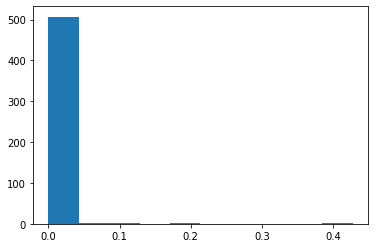

In [11]:
plt.hist(emp_group_size_pdf)

## Perform ABC

 t=999/1000

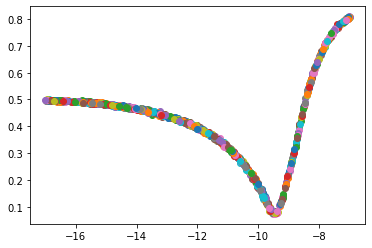

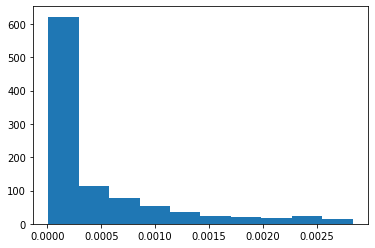

In [27]:
#########################################
#### Parameters
#########################################


# define number of trials to do for the posterior dist
T = 1000

# define the number of group to simulate
#here is my idea ----> 
num_groups_to_sample = round(len(empirical_group_sizes)/2) 

#define a 'distance' threshold
distance_threshold = 0.5


#########################################
#### Recording variables
#########################################

#define a place to store list of accepted parameters (this will be used to create posterior dist)
trial_p_list = []

#########################################
#### Run ABC
#########################################

#for loop over trials 
for t in range(T):
    print(f'\r t={t}/{T}', end='')
    
    
    # make model
    # if keep model:
        # add model parameter to final thing
    # else:
        # (throw out model parameter -> too far)
    
    #define distance and set it bigger than threshold, so that you enter the while loop
    JS_distance = float('inf')
    #while loop on distance > threshold
    while JS_distance > distance_threshold:
        #sample from prior
        trial_p = 2**np.random.uniform(-17,-7) #I am pretty sure it is in this range
        
        #run simulation code
        sim_group_sizes = run_model_N_gamma(max_group_size, trial_p, num_groups_to_sample)
        
        #find simulated PDF (you can use code from above -- you want to have the same bin edges as emp)
        
        ## get counts
        sim_size_hist, _ = np.histogram(sim_group_sizes, bin_edges)
        ##normalize histogram
        sim_group_size_pdf = sim_size_hist/np.sum(sim_size_hist)
        
        ##get histogram
        ##normalize histogram

        #find distance
        JS_distance = distance.jensenshannon(sim_group_size_pdf, emp_group_size_pdf)

        # this might help you refine your search --->
        plt.scatter(np.log2(trial_p),JS_distance)
        
    #add sample and increase count
    trial_p_list.append(trial_p)

#########################################
#### Plot results
#########################################
#plot posterior distribution (histogram)
plt.figure()
plt.hist(trial_p_list)
plt.show()


## Plot the empirical PDF and the best-fitting simulated PDF on the same plot
(Might try a log-log plot)

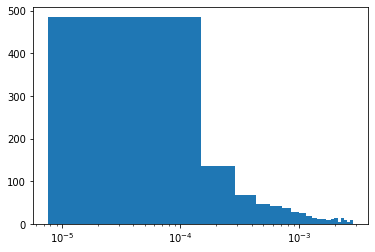

In [29]:
plt.hist(trial_p_list, bins=20)
plt.xscale('log')
